In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

"""
데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
"""
#CSV 파일을 데이터 프레임으로 변환
df = pd.read_csv(r'./5674-833/part7/auto-mpg.csv', header = None)

#열 이름 저장
df.columns = ['mpg', 'cylinders','displacement', 'horsepower', 'weight', 'acceleration',
             'model year','origin','name']

#데이터 살펴보기

print(df.head())
print('\n')

#Ipython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())

"""
step 2 데이터 탐색
"""

#데이터 자료형 확인
print(df.info())
print('\n')

#데이터 통계 요약정보 확인
print(df.describe())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

In [2]:
#horsepower 열의 자료형 변경 (문자열 - > 숫자)
print(df['horsepower'].unique())
print('\n')

df['horsepower'].replace('?', np.nan , inplace = True) # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis = 0, inplace =True) #누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float')  #문자열을 실수형으로 변환

print(df.describe())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1

In [3]:
"""
step 3 속성(feature 또는 variable )선택
"""

#분석에 활용할 열 (속성) 선택 (연비, 실린더, 출력 , 중량)

ndf = df[['mpg', 'cylinders','horsepower','weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


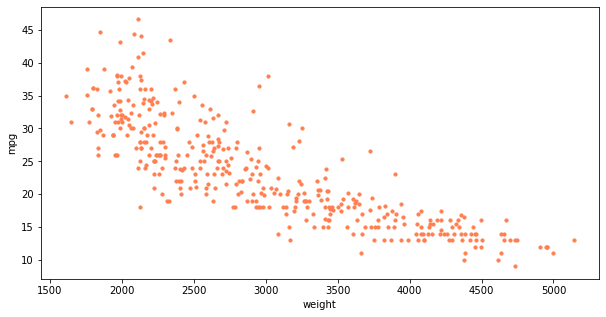

In [4]:
### 종속 변수 Y인 "연비(mpg)" 와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
#matplotlib으로 산점도 그리기

ndf.plot(kind='scatter', x= 'weight' ,y='mpg', c= 'coral', s=10, figsize=(10,5))
plt.show()
plt.close()

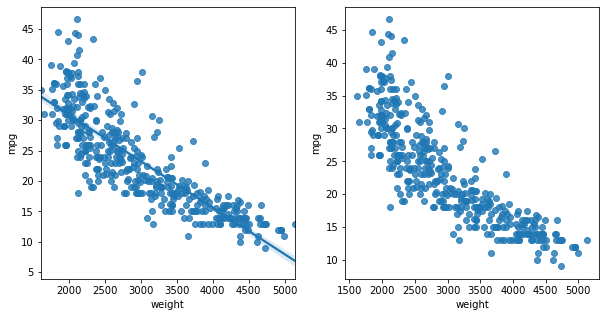

In [5]:
#seaborn 으로 산점도 그리기
fig = plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x = 'weight', y='mpg', data = ndf, ax=ax1)  #회기선 표시
sns.regplot(x= 'weight', y='mpg', data = ndf, ax=ax2, fit_reg =False) #회귀선 미표시
plt.show()
plt.close()

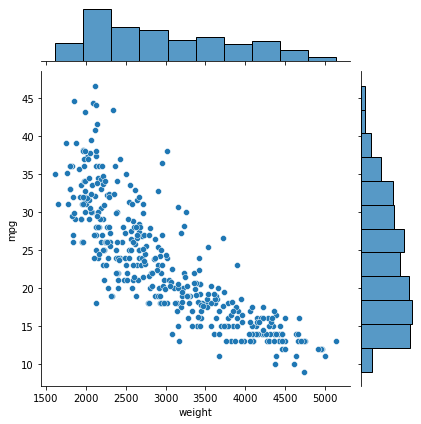

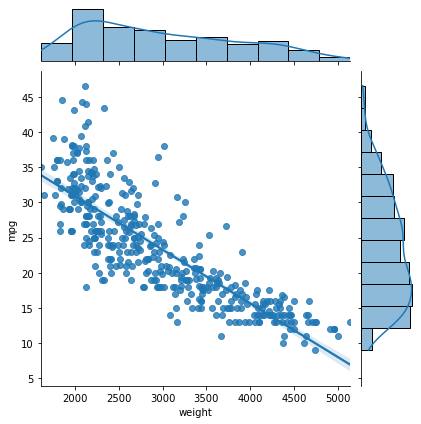

In [6]:
#seaborn 조인트 그래프 -산점도, 히스토그램
sns.jointplot(x= 'weight' ,y = 'mpg'  , data =ndf) #회귀선 미표시
sns.jointplot(x='weight', y= 'mpg', kind = 'reg', data =ndf) #회귀선 표시
plt.show()
plt.close()

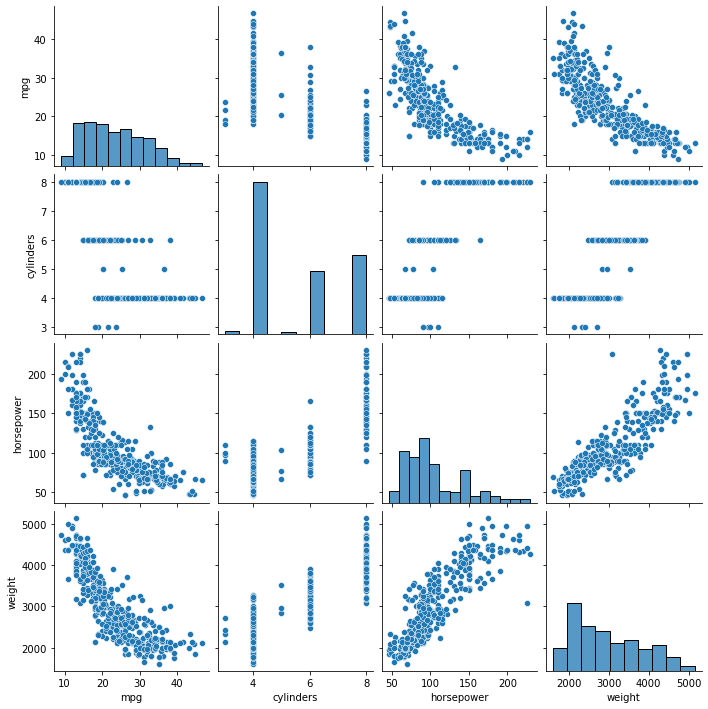

In [8]:
#seaborn pariplot 으로 두 변수 간의 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()



In [9]:
#step 4 데이터 셋 구분 - 훈련용 (train data) /검증용(test data)
#속성(변수) 선택

X = ndf[['weight']] #독립변수 X
y = ndf[['mpg']] #종속변수 Y

#train data 와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test  =train_test_split(X #독립변수
                                                     ,y  #종속변수
                                                     ,test_size=0.3  #검증 30%
                                                     ,  random_state =10) #랜덤 추출값

print('train data 개수 :',len(X_train))
print('test data 개수 :', len(X_test))

train data 개수 : 274
test data 개수 : 118


In [10]:
"""
step 5 단순회귀 분석 모형 만들기 - sklearn 사용
"""
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

#단순회귀분석 모형 객체 생성
lr =LinearRegression()
#train data를 가지고 모형 학습
lr.fit(X_train , y_train)
#학습을 마친 모형에 test data를 적용하여 결정계수 (R-제곱) 계산
r_square =lr.score(X_test ,y_test)
print(r_square)

0.6822458558299325


In [11]:
print('기울기 a: ',lr.coef_)
print('\n')
#회귀식의 y절편
print('y 절편 b', lr.intercept_)

기울기 a:  [[-0.00775343]]


y 절편 b [46.71036626]


C:\Users\chan\.conda\envs\py38_32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\chan\.conda\envs\py38_32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


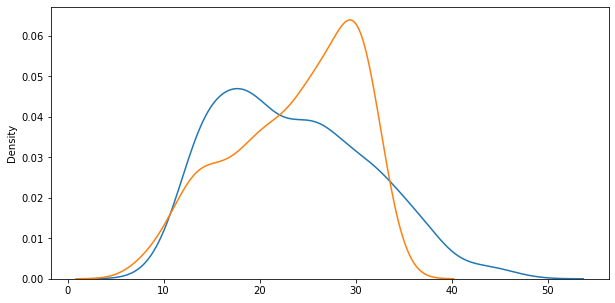

In [13]:
#모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat  = lr.predict(X)

plt.figure(figsize = (10,5))
ax1= sns.distplot(y, hist =False , label='y')
ax2= sns.distplot(y_hat , hist= False , label ='y_hat', ax=ax1)
plt.show()
plt.close()